# Equity Options Portfolio Optimization:
**Authors:** William Lester, Luke Rutherford, Dylan Kynoch, Henry Daniel \
**Start Date:** 4/17/2024 \
**Last Updated:** 4/17/2024

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import data_cleaning as dc, visualizations as vis

In [2]:
start_date,end_date="2022-01-01","2023-01-01"
start_date,end_date=pd.to_datetime(start_date),pd.to_datetime(end_date)

tickers = ['XOM', 'WMT', 'GPC', 'OXY', 'PM', 'NNI', 'FI', 'ATKR', 'VICI', 'ADBE', 'AMAT', 'STLD']

[*********************100%***********************]  12 of 12 completed


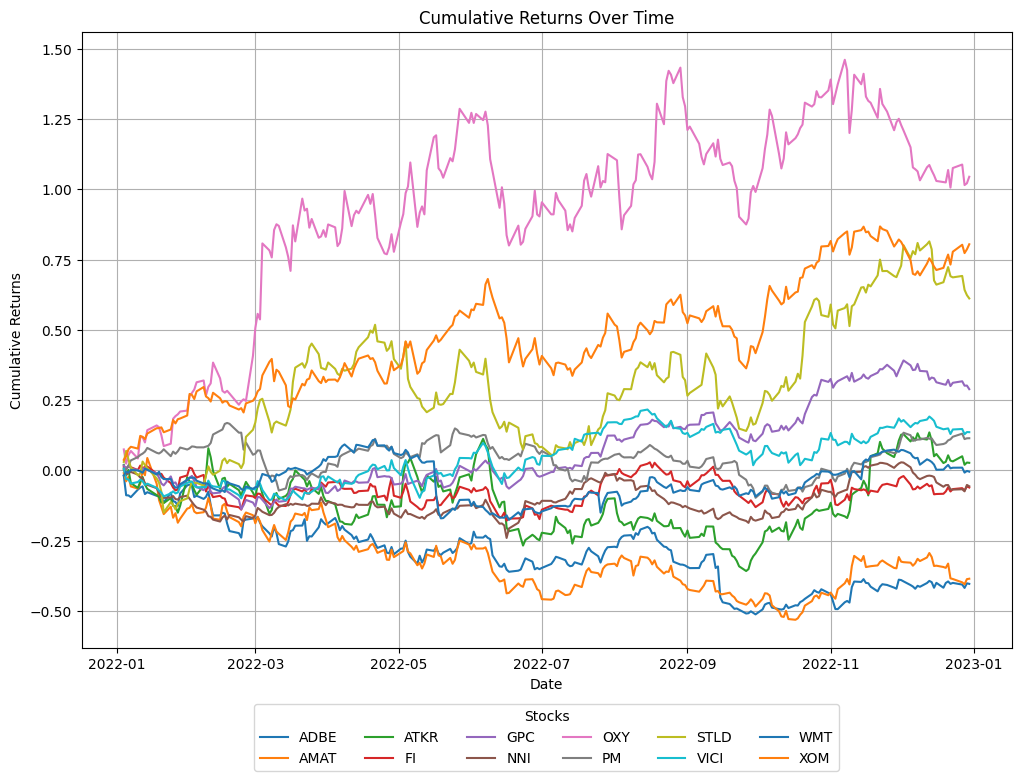

In [3]:
stock_df=dc.get_price_df(tickers,start_date,end_date)
returns_df=dc.get_log_returns(stock_df)
vis.plot_cumulative_returns(returns_df)

In [4]:
fred,poly=dc.connect_apis()
risk_free_rate=fred.get_series('GS10',start_date,start_date+pd.Timedelta(days=1))[0]/100

In [5]:
init_weights,init_ret,init_std=dc.get_init_port(returns_df,risk_free_rate)
init_weights=init_weights.round(3)
print('Initial Port Returns:',init_ret)
print('Initial Port Volatility:',init_std)
print('Initial Port Sharpe:',(init_ret-risk_free_rate)/init_std)
print('Optimal Weights:',dict(zip(returns_df.columns,init_weights)))

Initial Port Returns: 0.4987081989508199
Initial Port Volatility: 0.2726119702986885
Initial Port Sharpe: 1.764809514504046
Optimal Weights: {'ADBE': 0.0, 'AMAT': 0.0, 'ATKR': 0.0, 'FI': 0.0, 'GPC': 0.259, 'NNI': 0.0, 'OXY': 0.039, 'PM': 0.0, 'STLD': 0.119, 'VICI': 0.0, 'WMT': 0.0, 'XOM': 0.583}


## Simulation:
### Geometric Brownian Motion: 

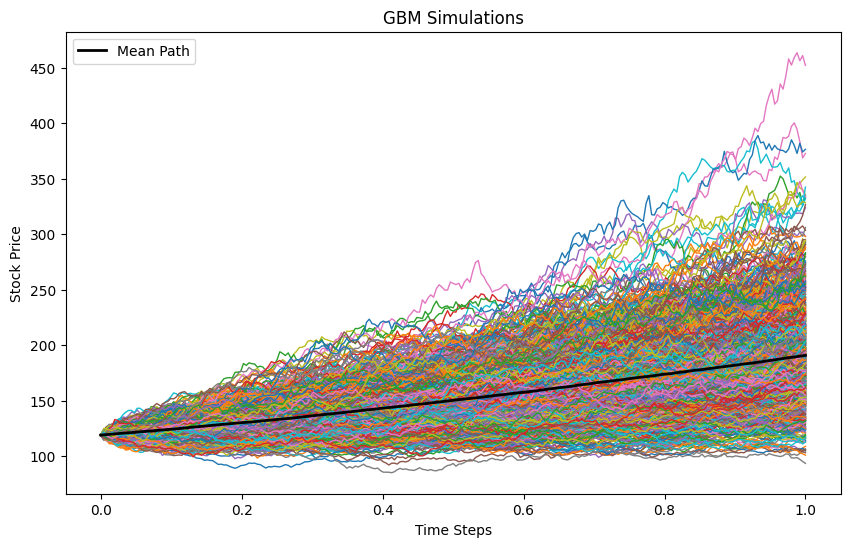

In [6]:
gbm_init_port=dc.simulate_gbm_portfolio(returns_df,stock_df,init_weights)
vis.plot_paths(gbm_init_port,True)

In [7]:
(gbm_init_port.mean(axis=0).iloc[-1]-gbm_init_port.mean(axis=0).iloc[0])/gbm_init_port.mean(axis=0).iloc[0]

0.6035247915111037